При помощи следующей программы: получить получить исходные данные для задачи классификации: матрицу признаков X и массив целевых меток y

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np
from matplotlib.colors import ListedColormap

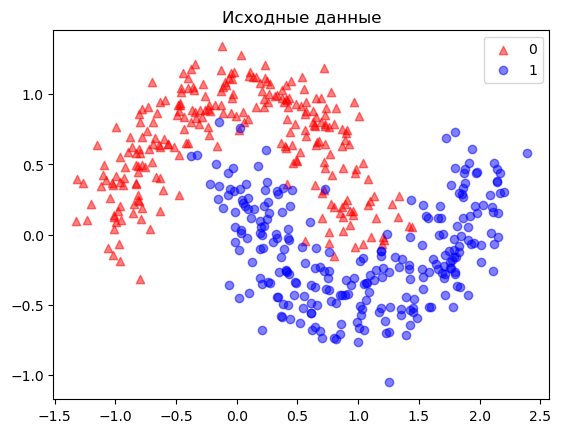

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=512, random_state=123, noise=0.18)
plt.figure(1)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5, label='1')
plt.legend()
plt.title("Исходные данные")
plt.show()

Задание 2. Создать и обучить модель классификации "к ближайшим сосодям". выбрать оптимальные гиперпараметры модели.

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [4]:
knn = KNeighborsClassifier()

param_grid_knn = {'weights': ['uniform', 'distance'],
                  'n_neighbors':[3,4,5,6]}

grid_knn = GridSearchCV(knn, param_grid_knn)
grid_knn.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [5]:
print(grid_knn.best_params_)

{'n_neighbors': 6, 'weights': 'uniform'}


Определить и вывести на печать удельные количества ошибок на обучающем и тестовом подмножествах данных

In [6]:
print(f'''Удельное количество ошибок на обучающем наборе: {np.mean(y_train != grid_knn.best_estimator_.predict(x_train))}
Удельное количество ошибок на тестовом наборе: {np.mean(y_test != grid_knn.best_estimator_.predict(x_test))}''')

Удельное количество ошибок на обучающем наборе: 0.025139664804469275
Удельное количество ошибок на тестовом наборе: 0.05194805194805195


Построить график области решений при помощи функции plot_decision_regions(), разработанной ранее на практических занятиях.

In [9]:
def plotDecisionRegions(x, y, classifier, resolution=0.02, test_idx=None):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = [(1, 0, 0), (0, 0, 1), (0.5, 1, 0.5), (0.5, 0.5, 0.5), (0, 1, 1)]  # Красный, синий, светло-зеленый, серый, голубой
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = x[:,0].min() - 1, x[:,0].max() + 1
    x2_min, x2_max = x[:,1].min() - 1, x[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],
                    edgecolor='black', marker = markers[idx], label=cl)
        if test_idx:
            x_test = x[test_idx, :]
            plt.scatter(x_test[:, 0], x_test[:, 1], c='', alpha=1.0,
                        edgecolor='black', linewidths=1, marker='o', s=120,
                        label='test set')

C:\Users\dmitr\AppData\Local\Temp\ipykernel_8024\2893109082.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],
C:\Users\dmitr\AppData\Local\Temp\ipykernel_8024\2893109082.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],


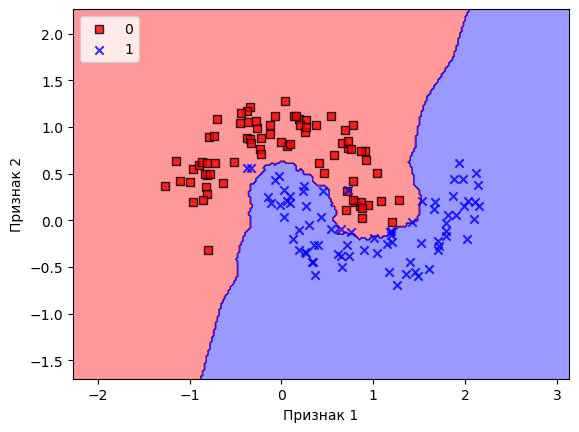

In [10]:
plotDecisionRegions(x_test, y_test, classifier=grid_knn.best_estimator_)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend(loc='upper left')
plt.show()
